In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
cst_df=pd.read_csv("investor_Data.csv")

In [6]:
cst_df.head()

,Age,Dependents,MonthlyIncome,CIBILScore,Married,CreditHistory,MonthlySavings,InvestorType
0,53,0,101947,692,No,0,22558.928721,Traditional
1,39,2,91001,775,Yes,1,27257.562737,Traditional
2,32,1,152775,838,Yes,1,59844.448534,Risky
3,45,0,63243,804,Yes,0,19817.742614,Traditional
4,43,3,182872,647,Yes,0,62527.307044,Traditional


In [7]:
cst_df.columns

Index(['Age', 'Dependents', 'MonthlyIncome', 'CIBILScore', 'Married',
       'CreditHistory', 'MonthlySavings', 'InvestorType'],
      dtype='object')

In [8]:
cst_df["Married"]=cst_df["Married"].map({"No":0,"Yes":1})

In [9]:
cst_df["InvestorType"]=cst_df["InvestorType"].map({"Traditional":0,"Risky":1})

In [10]:
cst_df.head()

,Age,Dependents,MonthlyIncome,CIBILScore,Married,CreditHistory,MonthlySavings,InvestorType
0,53,0,101947,692,0,0,22558.928721,0
1,39,2,91001,775,1,1,27257.562737,0
2,32,1,152775,838,1,1,59844.448534,1
3,45,0,63243,804,1,0,19817.742614,0
4,43,3,182872,647,1,0,62527.307044,0


In [11]:
cst_df[cst_df["Age"]==25]["MonthlyIncome"].median()

117573.5

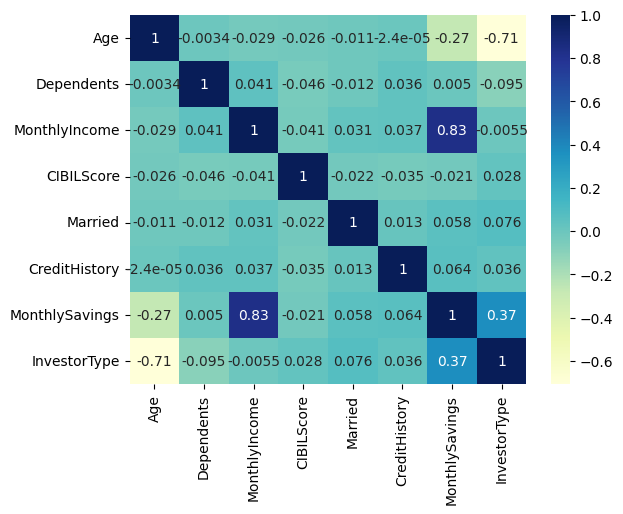

In [12]:
dataplot = sns.heatmap(cst_df.corr(), cmap="YlGnBu", annot=True) 

In [13]:
target=cst_df.iloc[:,-1:]
target.head()

,InvestorType
0,0
1,0
2,1
3,0
4,0


In [14]:
feature=cst_df.drop(["InvestorType"],axis=1)

In [15]:
feature.head()

,Age,Dependents,MonthlyIncome,CIBILScore,Married,CreditHistory,MonthlySavings
0,53,0,101947,692,0,0,22558.928721
1,39,2,91001,775,1,1,27257.562737
2,32,1,152775,838,1,1,59844.448534
3,45,0,63243,804,1,0,19817.742614
4,43,3,182872,647,1,0,62527.307044


In [16]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=42)

In [17]:
X_train.head()

,Age,Dependents,MonthlyIncome,CIBILScore,Married,CreditHistory,MonthlySavings
485,41,2,46859,783,0,0,8245.149998
527,35,1,38016,657,0,0,6057.354023
199,59,3,96314,693,0,1,28214.267780
889,52,2,89234,636,0,1,27592.375759
844,57,1,62430,694,0,0,9479.382408


In [18]:
y_train.head()

,InvestorType
485,0
527,0
199,0
889,0
844,0


In [19]:
from sklearn.linear_model import LogisticRegression
Lr_model=LogisticRegression()
Lr_model.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
Lr_model.score(X_test,y_test)

1.0

In [21]:
y_pred=Lr_model.predict(X_test)

In [22]:
y_test

,InvestorType
1116,0
1368,1
422,0
413,1
451,0
...,...
1083,0
990,1
650,1
1188,1


In [23]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       100

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [26]:
from joblib import dump
dump(Lr_model,"./../savemodels/customer_segmentation_model.joblib")

['./../savemodels/customer_segmentation_model.joblib']